<a href="https://colab.research.google.com/github/Ibrahimmohamed111/Titanic-machine-learning-dataset/blob/main/TitanicML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train data loaded successfully! Shape: (891, 12)
Test data loaded successfully! Shape: (418, 11)
Gender submission data loaded successfully! Shape: (418, 2)
Epoch 1/10


<ipython-input-3-094349757223>:62: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_data.fillna(train_data.mean(), inplace=True)
<ipython-input-3-094349757223>:63: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_data.fillna(test_data.mean(), inplace=True)


28/28 [==============================] - 1s 3ms/step - loss: 0.6913 - accuracy: 0.6734
Epoch 2/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7351
Epoch 3/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7396
Epoch 4/10
28/28 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.7553
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: 0.4913 - accuracy: 0.7823
Epoch 6/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4698 - accuracy: 0.7856
Epoch 7/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4642 - accuracy: 0.7957
Epoch 8/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4644 - accuracy: 0.7868
Epoch 9/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7890
Epoch 10/10
28/28 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.7969


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

28/28 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8002


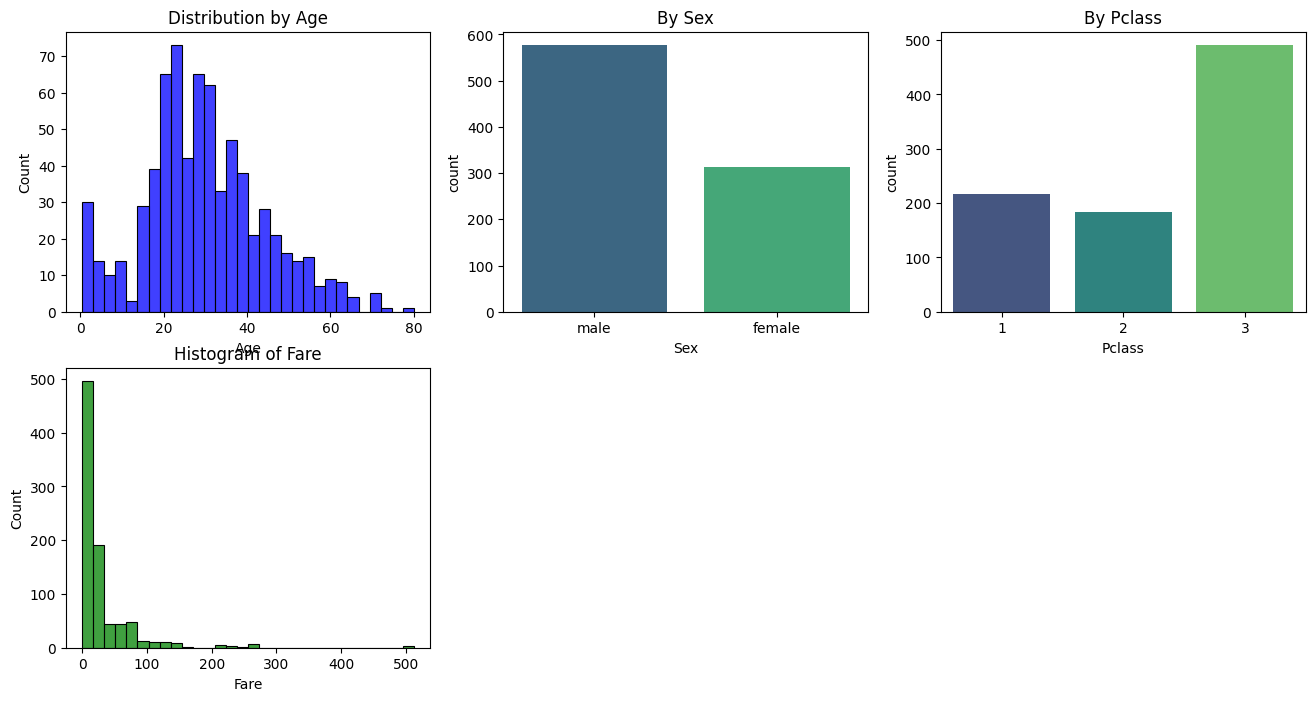

In [3]:
# Import libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

# Display the Titanic image
from IPython.display import Image, display
image_url = "https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg"
display(Image(url=image_url))

# Define the CSV links
train_data_url = "https://raw.githubusercontent.com/Ibrahimmohamed111/Titanic-machine-learning-dataset/main/train.csv"
test_data_url = "https://raw.githubusercontent.com/Ibrahimmohamed111/Titanic-machine-learning-dataset/main/test.csv"
gender_submission_url = "https://raw.githubusercontent.com/Ibrahimmohamed111/Titanic-machine-learning-dataset/main/gender_submission.csv"

# Read the train data
train_data = pd.read_csv(train_data_url)

# Read the test data
test_data = pd.read_csv(test_data_url)

# Read the gender submission data
gender_submission_data = pd.read_csv(gender_submission_url)

# Print confirmation messages
print(f"Train data loaded successfully! Shape: {train_data.shape}")
print(f"Test data loaded successfully! Shape: {test_data.shape}")
print(f"Gender submission data loaded successfully! Shape: {gender_submission_data.shape}")

# Explore Data: EDA Visualizations
# Let's create some visualizations to understand the data
plt.figure(figsize=(16, 8))

# EDA: Distribution of Age
plt.subplot(2, 3, 1)
sns.histplot(train_data['Age'].dropna(), bins=30, kde=False, color='blue')
plt.title('Distribution by Age')

# EDA: Countplot of Sex
plt.subplot(2, 3, 2)
sns.countplot(x='Sex', data=train_data, palette='viridis')
plt.title('By Sex')

# EDA: Countplot of Pclass
plt.subplot(2, 3, 3)
sns.countplot(x='Pclass', data=train_data, palette='viridis')
plt.title('By Pclass')

# EDA: Histogram of Fare
plt.subplot(2, 3, 4)
sns.histplot(train_data['Fare'], bins=30, kde=False, color='green')
plt.title('Histogram of Fare')

# Handle missing values
train_data.fillna(train_data.mean(), inplace=True)
test_data.fillna(test_data.mean(), inplace=True)

# Remove unnecessary columns
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin"]
train_data.drop(columns_to_drop, axis=1, inplace=True)
test_data.drop(columns_to_drop, axis=1, inplace=True)

# Identify and handle categorical features
categorical_features = list(train_data.select_dtypes(include=['object']).columns)
for feature in categorical_features:
    # One-hot encode categorical features
    train_data = pd.concat([train_data, pd.get_dummies(train_data[feature], drop_first=True)], axis=1)
    test_data = pd.concat([test_data, pd.get_dummies(test_data[feature], drop_first=True)], axis=1)

# Separate features and target variable
features = train_data.drop(["Survived"], axis=1)
target = train_data["Survived"]

# Check data types of features
feature_dtypes = features.dtypes

# Identify features with non-numerical data types
non_numerical_features = feature_dtypes[feature_dtypes != np.number].index

# Apply conversion and scaling for non-numerical features
for feature in non_numerical_features:
    if features[feature].dtype == 'object':  # Checking if the feature is of type 'object'
        features = pd.get_dummies(features, columns=[feature], drop_first=True)
    else:
        scaler = StandardScaler()
        features[feature] = scaler.fit_transform(features[feature].values.reshape(-1, 1))

# Convert all features to float32 for compatibility with TensorFlow
features = features.astype(np.float32)

# Separate features and target variable
target = train_data["Survived"]

# Neural Network
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu", input_shape=(features.shape[1],)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(features, target, epochs=10)

# Logistic Regression with GridSearchCV
param_grid = {"C": [0.1, 1, 10, 100], "penalty": ["l1", "l2"]}
grid_search_lr = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search_lr.fit(features, target)
best_model_lr = grid_search_lr.best_estimator_

# Random Forest with GridSearchCV
param_grid = {"n_estimators": [100, 200, 500], "max_depth": [3, 5, 7]}
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search_rf.fit(features, target)
best_model_rf = grid_search_rf.best_estimator_

# Evaluate the models
lr_score = best_model_lr.score(features, target)
rf_score = best_model_rf.score(features, target)
nn_score = model.evaluate(features, target)[1]